## Plot landsat-8 NDVI time series

In [1]:
%matplotlib inline

In [3]:
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams

ee.Initialize()

### Load landsat 8 image collection and roi 

In [14]:
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
point = {'type':'Point', 'coordinates':[-120.12, 37.61]};

### Retrieve information, reshape and calculate NDVI
Retrieving information from point geometry with a buffer of 500m over image collection. Reshaping data and calculating NDVI from **RED** and **NIR** band.

In [15]:
info = collection.getRegion(point,500).getInfo()

In [16]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['B5','B4']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

# Calculate NDVI
red = yData[:,0]
nir = yData[:,1]
ndvi = (nir - red) / (nir + red)

### Reshape NDVI array into Pandas Dataframe

In [ ]:
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])
df = df.interpolate()
df['Date'] = pd.Series(time, index=df.index)

### Plot the data frame

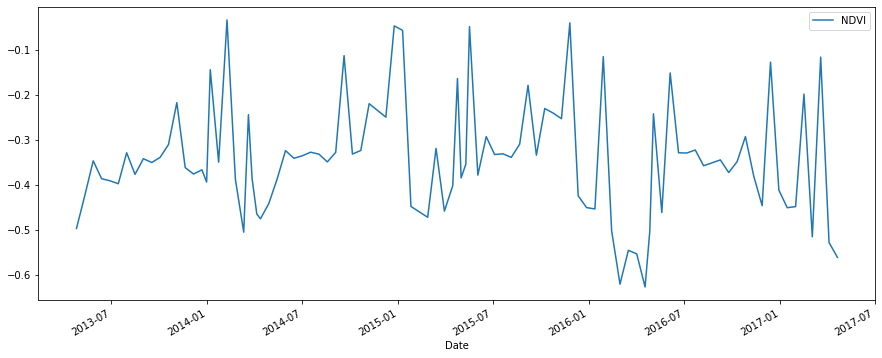

In [17]:
rcParams['figure.figsize'] = 15, 6
df.plot(y='NDVI',x='Date')
plt.show()